In [1]:
import numpy as np
import pandas as pd

from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib

In [2]:
cov = pd.read_csv('corona2.csv')

In [3]:
cov.head()

,%,Dia,Casos,Recuperados,Obitos
0,NaN,2.0,2,0,0
1,100.000000,3.0,4,0,0
2,50.000000,4.0,6,0,0
3,50.000000,5.0,9,0,0
4,44.444444,6.0,13,0,0


In [4]:
casos_cum = np.array(cov['Casos'])[0:92]
obitos = np.array(cov['Obitos'])[0:92]
recuperados = np.array(cov['Recuperados'])[0:92]
ativos = np.array(casos_cum - obitos - recuperados)


In [5]:
ativos

array([    2,     4,     6,     9,    13,    21,    30,    39,    41,
          59,    78,   112,   168,   243,   328,   444,   637,   779,
        1009,  1263,  1581,  2023,  2307,  2930,  3451,  4149,  5027,
        5800,  6225,  7240,  8021,  8757,  9572, 10183, 10908, 11279,
       11913, 12565, 13342, 14804, 15251, 15804, 16122, 16534, 17109,
       17719, 17846, 18388, 18882, 19518, 19700, 20054, 20332, 20715,
       21114, 21451, 21561, 21804, 21881, 22184, 22333, 22496, 22550,
       22749, 22885, 23017, 23352, 23732, 23781, 23897, 23986, 23737,
       23775, 23937, 24065, 23785, 23182, 21548, 21754, 21945, 22183,
       21321, 21464, 11758, 11636, 11569, 11587, 11590, 11652, 11621,
       11681, 11724])

In [6]:
casos_novos=[2]

for i in range(len(casos_cum)-1):
    casos_novos.append(casos_cum[i+1]-casos_cum[i])
    
casos_novos=np.array(casos_novos)    

In [7]:
casos_novos

array([   2,    2,    2,    3,    4,    8,    9,    9,    2,   18,   19,
         34,   57,   76,   86,  117,  194,  143,  235,  260,  320,  460,
        302,  633,  559,  714,  902,  792,  446, 1035,  808,  783,  852,
        638,  754,  452,  712,  699,  815, 1516,  515,  598,  349,  514,
        643,  750,  181,  663,  521,  657,  516,  603,  371,  444,  474,
        412,  163,  295,  183,  368,  295,  203,   92,  242,  178,  480,
        533,  553,  138,  175,   98,  234,  219,  187,  264,  227,  226,
        173,  223,  228,  252,  288,  271,  152,  165,  219,  285,  304,
        350,  257,  297,  200])

In [8]:
from math import floor

def cma(L, n):

    f = floor(n/2)
    l = len(L)
    
    n_cma = []
    
    for i in range(f):
        n_cma.append(np.mean(L[0 : 2*i+1]))
    
    for i in range(l-2*f):
        n_cma.append(np.mean(L[i : i+2*f+1]))
        
    for i in range(f):
        n_cma.append(np.mean(L[-2*(f-1-i)-1 : -1]))
        
        
    return n_cma    

In [9]:
# function with the model equations

def deriv(X, t):
    S, E, I_m, I_s, I_d, R_m, R_s, D = X 
    
    
    
    lam = beta*(sigma*I_m + I_s)/(N-I_d)
    
    
    
    dS = -S*lam
    dE = S*lam - alpha*E
    dI_m = p*alpha*E - gamma_m*I_m
    dI_s = (1-p)*alpha*E - mu*I_s
    dI_d = mu*I_s - gamma_s*I_d - eta*I_d
    dR_m = gamma_m*I_m
    dR_s = gamma_s*I_d
    dD = eta*I_d
    
    
    return [dS, dE, dI_m, dI_s, dI_d, dR_m, dR_s, dD]

In [10]:
# Initial conditions for the parameters


alpha = 1/4
mu = 1/5

gamma_m = 1/7
gamma_s = 1/14
sigma = 0.5
p = 0.8
eta =  0.0032# 0.000940802# 0.00142#


m = pow(10,6)
N = 10.2*m
c = 13.74


In [11]:
# Estimation of best parameters R_0 and I using least squares method 
    
    
I_m = 9.6
I_s = 2.4
I_d = 2
E = 13.74*12
R_m = 0
R_s = 0
D = 0
S = 10.2*m - I_m - I_s - I_d - E - R_m - R_s - D
    
r_0 = 3


    
epsi = r_0/(c*(p*sigma/gamma_m + (1-p)/(mu)))
    
beta = c*epsi
   
    
    
X = S, E, I_m, I_s, I_d, R_m, R_s, D
       
    
diag_prev = odeint(deriv, X, np.linspace(1,17, 17))
diag_prev = np.around(diag_prev)
   
    
    
d_0 = sum((np.log(diag_prev[:,4]) - np.log(ativos[0:17]))**2)
                                                 




for r_0 in np.linspace(3,7, 81):
                
        
        epsi = r_0/(c*(p*sigma/gamma_m + (1-p)/mu))

        beta = c*epsi
    
        for I in np.linspace(5, 40, 36):

    
            I_m = 0.8*I
            I_s = 0.2*I
            E = 13.74*I

            X = S, E, I_m, I_s, I_d, R_m, R_s, D
    
    
            diag_prev = odeint(deriv, X, np.linspace(1,17,17))
            diag_prev = np.around(diag_prev)
    
            dist = sum((np.log(diag_prev[:,4])- np.log(ativos[0:17]))**2)
            if dist < d_0:
                d_0 = dist
                param = r_0, I
      
    
print(param) 

(6.45, 12.0)


In [12]:
# Estimation of parameter for second stange (19 march - 27 march) using least squares method 
    
    
I_m = 9.6
I_s = 2.4
I_d = 2
E = 13.74*12
R_m = 0
R_s = 0
D = 0
S = 10.2*m - I_m - I_s - I_d - E - R_m - R_s - D
    
r_0 = 6.45
c = 13.74

    
epsi = r_0/(c*(p*sigma/gamma_m + (1-p)/(mu)))
  
beta = c*epsi
    
    
    
X = S, E, I_m, I_s, I_d, R_m, R_s, D
       
    
phas1 = odeint(deriv, X, np.linspace(1, 17, 17))
phas1 = np.around(phas1)   


X = phas1[-1]    
    
d = 10


for r in np.linspace(0.1,1,201):

        
    beta = r*c*epsi


    phas2 = odeint(deriv, X, np.linspace(1,11,11))
    phas2 = np.around(phas2)

    dist = sum((np.log(phas2[1:,4]) - np.log(ativos[17:27]))**2)

    if dist<d:
        d = dist
        red1 = r
        
print(red1) 

0.505


In [13]:
red1*13.74

6.9387

In [14]:
(7/13.64)*13.74

7.051319648093841

In [15]:
# Estimation of reduction on contact rate for third stange (28 march - 6 April ) using least squares method 


I_m = 9.6
I_s = 2.4
I_d = 2
E = 13.74*12
R_m = 0
R_s = 0
D = 0
S = 10.2*m - I_m - I_s - I_d - E - R_m - R_s - D
    
r_0 = 6.45
c = 13.74


    
epsi = r_0/(c*(p*sigma/gamma_m + (1-p)/(mu)))
  
beta = c*epsi
   
    
    
X = S, E, I_m, I_s, I_d, R_m, R_s, D
       
       
phas1 = odeint(deriv, X, np.linspace(1,17, 17))
phas1 = np.around(phas1)   

X = phas1[-1]    


beta = red1*c*epsi

phas2 = odeint(deriv, X, np.linspace(1,11,11))
phas2 = np.around(phas2)

X = phas2[-1]


d = 10


for r in np.linspace(0,1,201):

    
    beta = r*c*epsi


    phas3 = odeint(deriv, X, np.linspace(1,26,26))
    phas3 = np.around(phas3)

    dist = sum((np.log(phas3[1:,4]) - np.log(ativos[27:52]))**2)

    if dist<d:
        d = dist
        red2 = r
        
        
print(red2) 

0.17


In [16]:
red2*r_0

1.0965

In [17]:

    
I_m = 9.6
I_s = 2.4
I_d = 2
E = 13.74*12
R_m = 0
R_s = 0
D = 0
S = 10.2*m - I_m - I_s - I_d - E - R_m - R_s - D
    
r_0 = 6.45
c = 13.74

    
epsi = r_0/(c*(p*sigma/gamma_m + (1-p)/(mu)))
  
beta = c*epsi
   
    
    
X = S, E, I_m, I_s, I_d, R_m, R_s, D
       
    
phas1 = odeint(deriv, X, np.linspace(1,17, 17))
phas1 = np.around(phas1)   

X = phas1[-1]    


beta = red1*c*epsi

phas2 = odeint(deriv, X, np.linspace(1,11,11))
phas2 = np.around(phas2)

X = phas2[-1]


beta = red2*c*epsi

phas3 = odeint(deriv, X, np.linspace(1,30,30))
phas3 = np.around(phas3)

X = phas3[-1]


d = 10


for r in np.linspace(0,1,201):

        
    beta = r*c*epsi


    phas4 = odeint(deriv, X, np.linspace(1,26,26))
    phas4 = np.around(phas4)

    dist = sum((np.log(phas4[1:,4]) - np.log(ativos[52:77]))**2)

    if dist<d:
        d = dist
        red3 = r
        
print(red3) 

0.17


In [18]:

    
I_m = 9.6
I_s = 2.4
I_d = 2
E = 13.74*12
R_m = 0
R_s = 0
D = 0
S = 10.2*m - I_m - I_s - I_d - E - R_m - R_s - D
    
r_0 = 6.45
c = 13.74

    
epsi = r_0/(c*(p*sigma/gamma_m + (1-p)/(mu)))
  
beta = c*epsi
   
    
    
X = S, E, I_m, I_s, I_d, R_m, R_s, D
       
    
phas1 = odeint(deriv, X, np.linspace(1,17, 17))
phas1 = np.around(phas1)   

X = phas1[-1]    


beta = red1*c*epsi

phas2 = odeint(deriv, X, np.linspace(1,11,11))
phas2 = np.around(phas2)

X = phas2[-1]


beta = red2*c*epsi

phas3 = odeint(deriv, X, np.linspace(1,26,26))
phas3 = np.around(phas3)

X = phas3[-1]


phas4 = odeint(deriv, X, np.linspace(1,26,26))
phas4 = np.around(phas4)

X = phas4[-1]


d = 10


for r in np.linspace(0,1,201):

        
    beta = r*c*epsi


    phas5 = odeint(deriv, X, np.linspace(1,16,16))
    phas5 = np.around(phas5)

    dist = sum((np.log(phas5[1:,4]) - np.log(ativos[77:92]))**2)

    if dist<d:
        d = dist
        red4 = r
        
print(red4) 

0.0


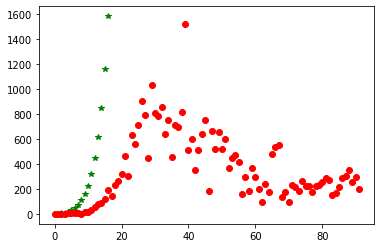

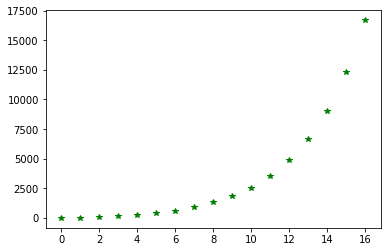

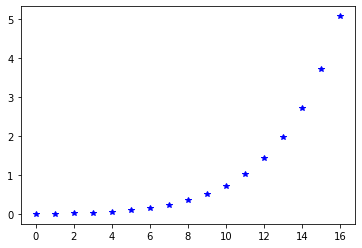

In [19]:
diagnosed = phas1[:,4]
cum = []

for i in range(len(diagnosed)): 
    cum.append(sum(diagnosed[0:i]))
    
    
real = phas1[:,2] + phas1[:,3]    
    
cum_real = []    
for i in range(len(diagnosed)): 
    cum_real.append(sum(real[0:i]))    


dead = eta * diagnosed
cum_dead = []
for i in range(len(diagnosed)): 
    cum_dead.append(sum(dead[0:i])) 



    
plt.plot(cum,'g*', casos_novos, 'ro')
plt.show()

plt.plot(cum_real,'g*')
plt.show()

plt.plot(cum_dead,'b*')
plt.show()

In [21]:
casos_novos[39:50]

array([1516,  515,  598,  349,  514,  643,  750,  181,  663,  521,  657])

ValueError: x and y must have same first dimension, but have shapes (180,) and (15,)

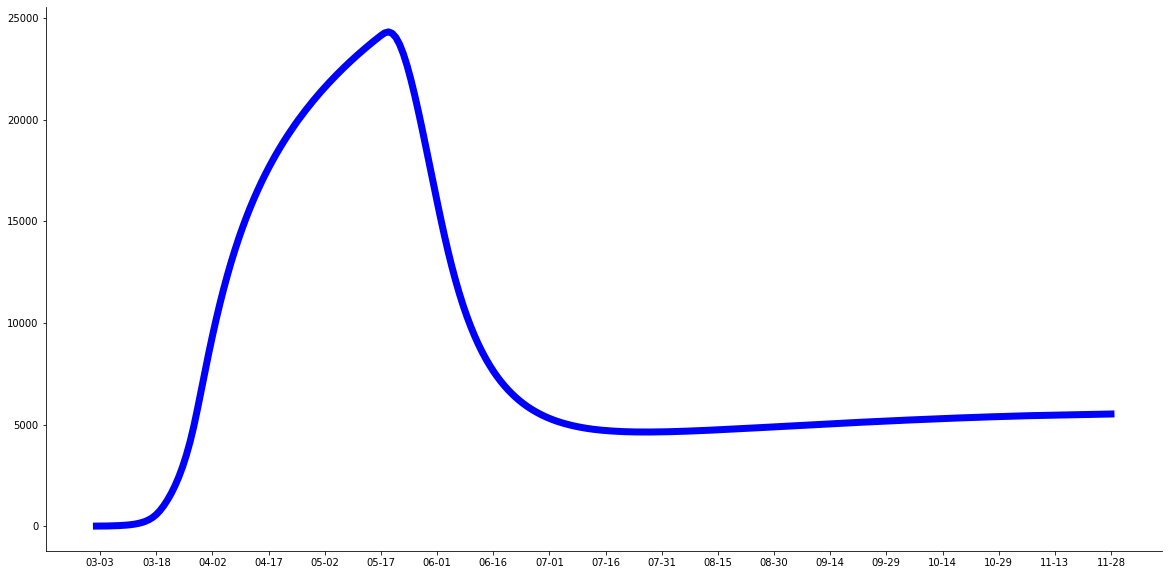

In [24]:
# Caso com medida de mitigação


I_m = 9.4
I_s = 2.6
I_d = 2
E = 13.74*(I_m + I_s)
R_m = 0
R_s = 0
D = 0
S = 10.2*m - I_m - I_s - I_d - E - R_m - R_s - D  




# Fase 1


r_0 = 6.45

c = 13.74

epsi = r_0/(c*(p*sigma/gamma_m + (1-p)/mu))

beta = c*epsi


X = S, E, I_m, I_s, I_d, R_m, R_s, D


phas1 = odeint(deriv, X, np.linspace(1,17,17))
phas1 = np.around(phas1)




# Fase 2


beta = red1*c*epsi


X = phas1[-1]


phas2 = odeint(deriv, X, np.linspace(1,11, 11))
phas2 = np.around(phas2)



#caso2_novos = np.concatenate((phas1[:,4], phas2[1:,4]))


#plt.plot(caso2_novos,'g', ativos, 'ro')
#plt.show()




# Fase 3


beta = red2*c*epsi


X = phas2[-1]


phas3 = odeint(deriv, X, np.linspace(1,26, 26))
phas3 = np.around(phas3)




# Fase 4


beta = red3*c*epsi


X = phas3[-1]


phas4 = odeint(deriv, X, np.linspace(1,26, 26))
phas4 = np.around(phas4)



# Fase 5


beta = red4*c*epsi


X = phas4[-1]


phas5 = odeint(deriv, X, np.linspace(1,16, 16))
phas5 = np.around(phas5)




# Fase 6a


beta = red3*c*epsi


X = phas5[-1]


phas6a = odeint(deriv, X, np.linspace(1,181, 181))
phas6a = np.around(phas6a)




# Fase 6b


beta = 0.16*c*epsi


X = phas5[-1]


phas6b = odeint(deriv, X, np.linspace(1,181, 181))
phas6b = np.around(phas6b)





caso2_novos = np.concatenate((phas1[:,4], phas2[1:,4], phas3[1:,4], phas4[1:,4], phas5[1:,4], phas6a[1:,4]))


cum5b = phas5b[1:,4]+phas5b[1:,6]+phas5b[1:,7]


import matplotlib.dates as mdates
import datetime as dt



fig = plt.figure(figsize=(20,10))
ax = fig.gca()


ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)


march_2 = dt.date(2020,3,2)
then = march_2 + dt.timedelta(days=272)
t = mdates.drange(march_2,then,dt.timedelta(days=1))
t = t.astype('int32')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=15))




plt.plot(t, caso2_novos, color='blue', linewidth=7)

plt.plot(t[91:271], phas5b[1:,4], 'red', linewidth=7)

plt.fill_between(t[91:271], caso2_novos[91:271], phas5b[1:,4], color='lightcyan', alpha='0.5')

plt.plot(t[0:92], ativos, color='gray', marker = 'o', markersize=10)




font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 25}

matplotlib.rc('font', **font)


from datetime import date

dates = [date.fromordinal(t[0]), date.fromordinal(t[63]),   date.fromordinal(t[91]), date.fromordinal(t[192])]

plt.xticks(dates, fontsize=15)
plt.yticks([0, 20000, 30000, 40000])

plt.ylabel('Número de casos')

plt.title('Evolução diária do número de casos confirmados ativos')

plt.show()





fig = plt.figure(figsize=(20,10))
ax = fig.gca()


ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)


march_2 = dt.date(2020,3,2)
then = march_2 + dt.timedelta(days=272)
t = mdates.drange(march_2,then,dt.timedelta(days=1))
t = t.astype('int32')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator([2]))


plt.plot(t[0:91], caso2_novos[0:91], color='blue', linewidth=7)

plt.scatter(t[0:91], ativos, color='gray', marker = 'o')

plt.ylabel('Número de casos')

plt.title('Evolução diária do número de casos confirmados ativos')

plt.show()


In [ ]:
print(cum5b[1:])
print(cum5b[:-1])

In [ ]:
uci_prev[0:20]

In [26]:
casos_cum = np.concatenate((phas1[:,4]+phas1[:,6]+phas1[:,7], phas2[1:,4]+phas2[1:,6]+phas2[1:,7], phas3[1:,4]+phas3[1:,6]+phas3[1:,7], phas4[1:,4]+phas4[1:,6]+phas4[1:,7], phas5a[1:,4]+phas5a[1:,6]+phas5a[1:,7]))
casos_novos_diarios = casos_cum[1:] - casos_cum[:-1]


phas5b_novos = phas5b[2:,4]+phas5b[2:,6]+phas5b[2:,7]-phas5b[1:-1,4]-phas5b[1:-1,6]-phas5b[1:-1,7]

NameError: name 'phas5a' is not defined

In [ ]:
casos_novos_diarios[:30]

NameError: name 'casos_novos_diarios' is not defined

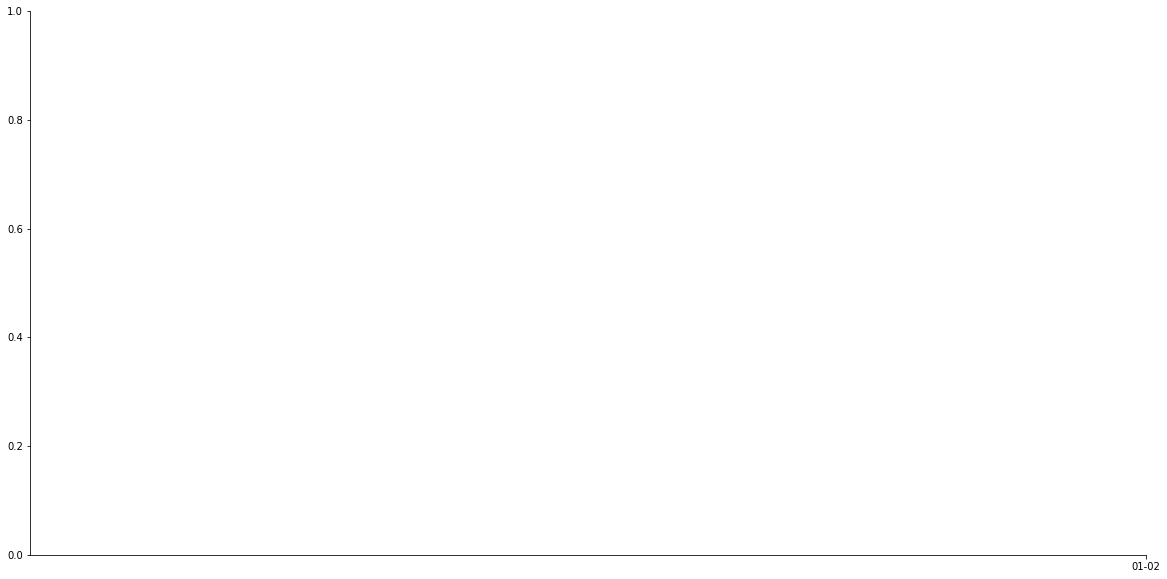

In [25]:




fig = plt.figure(figsize=(20,10))
ax = fig.gca()


ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)


march_2 = dt.date(2020,3,2)
then = march_2 + dt.timedelta(days=260)
t = mdates.drange(march_2,then,dt.timedelta(days=1))
t = t.astype('int32')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator([2]))




plt.plot(t[:259], casos_novos_diarios, color='blue', linewidth=7)

plt.plot(t[79:258], phas5b_novos, 'red', linewidth=7)

plt.fill_between(t[79:258], casos_novos_diarios[79:258], phas5b_novos, color='lightcyan', alpha='0.5')

#plt.plot(t[0:80], ativos, color='gray', marker = 'o', markersize=10)




font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 25}

matplotlib.rc('font', **font)


from datetime import date

dates = [date.fromordinal(t[0]), date.fromordinal(t[63]),   date.fromordinal(t[91]), date.fromordinal(t[192])]

plt.xticks(dates, fontsize=15)
plt.yticks()

plt.ylabel('Número de novos casos')

plt.title('Evolução diária do número de novos casos diários confirmados ')

plt.show()

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: x and y must have same first dimension, but have shapes (80,) and (92,)

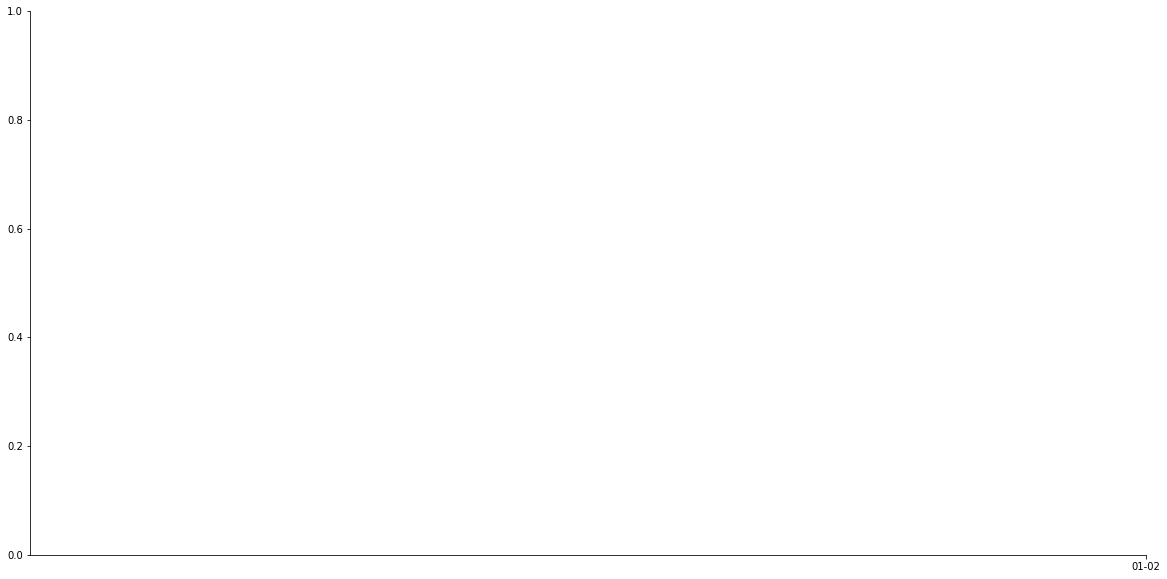

In [27]:

l= len(casos_novos)

aver = cma(casos_novos, 15)

fig = plt.figure(figsize=(20,10))
ax = fig.gca()

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

march_2 = dt.date(2020,3,2)
then = march_2 + dt.timedelta(days=260)
t = mdates.drange(march_2,then,dt.timedelta(days=1))
t = t.astype('int32')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator([2]))


plt.plot(t[0:80], aver,'b', linewidth=3.0)
plt.scatter(t[0:80], casos_novos, s=30, color='red', marker='o')


plt.ylabel('Número de casos')
plt.yticks([0, 250, 500, 750, 1000, 1250, 1500])


plt.title('Novos casos confirmados por dia')

plt.show()

In [28]:
ativos.dtype

dtype('int64')

In [29]:
casos_novos.dtype

dtype('int64')

In [30]:
max(aver)

794.5333333333333

In [31]:
hosp = pd.read_csv('TIME DATA PT.csv')

In [32]:
hosp.head(16)

,Date,Cases cumulative,New cases,Deaths cumulative,New deaths,Hospitalized cumulative CORRECTED,New hospitalized CORRECTED,New hospitalized (37% of hospitals),Hospitalized active,UCI,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,3/2/20,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3/3/20,4.0,2.0,0.0,0.0,7.0,7.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3/4/20,5.0,1.0,0.0,0.0,15.0,8.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3/5/20,9.0,4.0,0.0,0.0,17.0,2.0,1.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3/6/20,13.0,4.0,0.0,0.0,19.0,2.0,1.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3/7/20,21.0,8.0,0.0,0.0,29.0,10.0,6.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3/8/20,30.0,9.0,0.0,0.0,32.0,3.0,2.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3/9/20,39.0,9.0,0.0,0.0,34.0,2.0,1.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,3/10/20,41.0,2.0,0.0,0.0,39.0,5.0,3.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3/11/20,59.0,18.0,0.0,0.0,46.0,7.0,4.0,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
internados = hosp['Hospitalized active']
uci = hosp['UCI']

In [34]:
len(internados)

85

In [35]:
uci[:20]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16    20.0
17    20.0
18    26.0
19    35.0
Name: UCI, dtype: float64

In [36]:
prop_perc_int_ati = (internados[17:80]/ativos[17:])*100

ValueError: operands could not be broadcast together with shapes (63,) (75,) 

In [ ]:
print(prop_perc_int_ati)
print(np.mean(prop_perc_int_ati))

In [ ]:
prop_perc_uci_int = (uci[16:80]/internados[16:80])*100

In [ ]:
print(prop_perc_uci_int)
print(np.mean(prop_perc_uci_int))

In [ ]:
prop_perc_uci_int = (np.mean(uci[16:80])/np.mean(ativos[16:80]))*100

In [ ]:
print(prop_perc_uci_int)
print(np.mean(prop_perc_uci_int))

In [37]:
prop_perc_uci_int = (uci[16:80]/ativos[16:80])*100
print(prop_perc_uci_int)
print(np.mean(prop_perc_uci_int))

16    3.139717
17    2.567394
18    2.576809
19    2.771180
20    2.593295
        ...   
75    0.483498
76    0.465879
77    0.487284
78    0.464282
79    0.423787
Name: UCI, Length: 64, dtype: float64
1.3780033442308075
